<a href="https://colab.research.google.com/github/versant2612/jnotebooks/blob/main/Minicurso_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning na prática com TensorFlow

## Representação de redes neurais em grafo

In [2]:
% pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Conv2D, MaxPooling2D, Flatten, Dropout
from graphviz import Source

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=e58d94ed4608e35a5be69fc65ed661433be37b658669b3b7f4acd1aab813b178
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


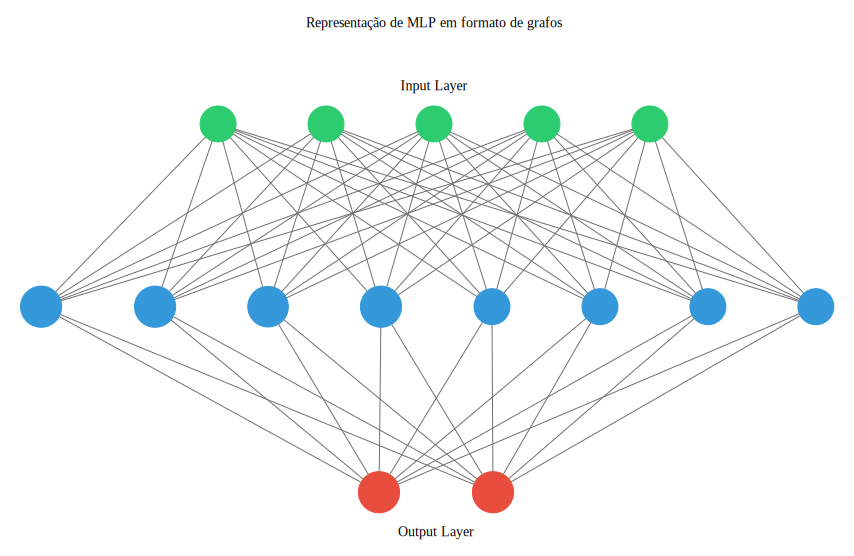

In [3]:
model = Sequential()
model.add(Dense(8, input_dim=5))
model.add(Dense(2))
ann_viz(model, title="Representação de MLP em formato de grafos", view=True)
Source.from_file('network.gv')

## De volta à Álgebra Linear




Cada um dos neurônios realiza uma combinação linear de todos os valores da camada anterior, uma espécie de ponderação da relevância de cada um dos sinais de entrada para produzir a saída.

Como cada neurônio de uma camada precisa da combinação linear de todos os neurônios da camada anterior, podemos representar todos esses pesos através de uma matriz e realizar um produto vetorial com o vetor de entrada. 

Assim, uma das principais operações necessárias em redes neurais é computar $y = Ax + b$. Vejamos um exemplo para uma entrada $x$ com dimensão `(5, 1)`.

In [4]:
import numpy as np
x = np.random.rand(5, 1)
x

array([[0.99673764],
       [0.85763906],
       [0.37842941],
       [0.69993245],
       [0.90056323]])

Também temos uma matriz $A$ de dimensões `(8, 5)` com os pesos de uma combinação de linear de $x$. 

**esmiuçar combinação linear**


In [5]:
A = np.random.rand(8, 5)
A

array([[0.67711633, 0.63100405, 0.29224772, 0.67414164, 0.7966816 ],
       [0.24150531, 0.15952969, 0.37629114, 0.56899397, 0.85351867],
       [0.98653927, 0.73957968, 0.37137681, 0.79601211, 0.0607216 ],
       [0.25076272, 0.75956259, 0.90685206, 0.53892371, 0.82411442],
       [0.284658  , 0.03395665, 0.61223808, 0.68917425, 0.68726006],
       [0.93771921, 0.76054355, 0.07680462, 0.20810357, 0.60632014],
       [0.94372589, 0.17948175, 0.21477288, 0.22163412, 0.94128649],
       [0.25754586, 0.93288924, 0.86791245, 0.06551343, 0.28564323]])

Ao realizar a operação $Ax$ temos uma saída com dimensões `(8, 1)`



In [6]:
Ax = np.dot(A, x)
Ax

array([[2.51599195],
       [1.68684083],
       [2.36999149],
       [2.36393201],
       [1.64583734],
       [2.30768507],
       [2.17867096],
       [1.68832626]])

Adicionamos um vetor $b$ (bias) que será somado, uma espécie de deslocamento no espaço vetorial

In [7]:
b = np.random.rand(8, 1)
b

array([[0.54633953],
       [0.79085462],
       [0.3326524 ],
       [0.98797345],
       [0.9544778 ],
       [0.27250299],
       [0.93650256],
       [0.85121877]])

A operação $Ax + b$ será a saída de nossa camada da rede neural. Nossa entrada tinha dimensões `(5,1)` e nossa saída tem dimensões `(8,1)`.

In [8]:
Ax + b

array([[3.06233148],
       [2.47769545],
       [2.7026439 ],
       [3.35190546],
       [2.60031514],
       [2.58018806],
       [3.11517352],
       [2.53954503]])

Dada uma entrada $x$, queremos encontrar uma matriz $A$ e um vetor $b$ de forma que $y = Ax + b$ seja nossa saída desejada. Encontrar estes valores é o objetivo do aprendizado de uma rede neural. O problema é que encontrando $A$ e $x$ neste formato só poderemos resolver problemas linearmente separáveis. Solucionamos este problema adicionando uma função com comportamento **não linear**, como por exemplo a sigmoide, tangente hiperbólica e retificadora:


$$ sigmoid(x) = \frac{1}{1 + e^{-x}}, \qquad tanh(x) = \frac{sinh(x)}{cosh(x)}, \qquad ReLU(x) = max(0, x)$$



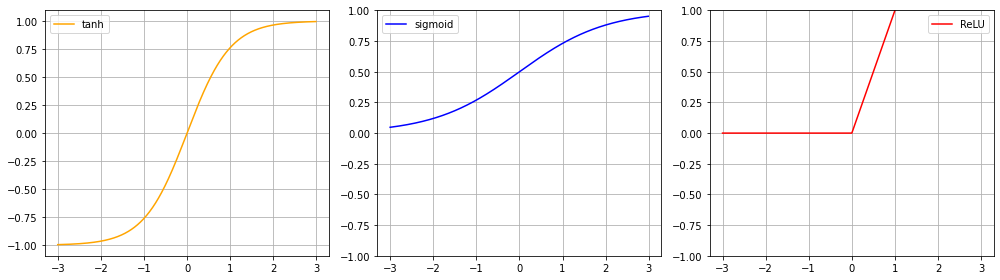

In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(14, 4))

values = np.arange(-3, 3, 0.01)

fn = np.tanh(values)
ax1.plot(values, fn, color='orange', label='tanh')
ax1.grid()
ax1.legend()

fn = 1/(1 + np.exp(-values))
ax2.plot(values, fn, color='blue', label='sigmoid')
ax2.set_ylim([-1,1])
ax2.grid()
ax2.legend()

fn = values * (values > 0)
ax3.plot(values, fn, color='red', label='ReLU')
ax3.set_ylim([-1,1])
ax3.grid()
ax3.legend()

plt.tight_layout()
plt.show()

Esta função não-linear aplicada após a combinação linear dos neurônios é chamada função de ativação. Utilizando a tangente hiperbólica temos $y = tanh(Ax + b)$

In [10]:
y = np.tanh(Ax + b)
y

array([[0.9956331 ],
       [0.98600793],
       [0.99105467],
       [0.99755054],
       [0.98903428],
       [0.98858643],
       [0.9960702 ],
       [0.98762589]])

A saída $y$ em nosso exemplo é utilizada como entrada para uma nova camada, que chamaremos de **camada oculta**. O processo de calcular $y = tanh(Ax + b)$ é realizado novamente, porém agora com a dimensionalidade alterada de acordo com o tamanho da saída da camada anterior.

Assim, podemos descrever uma rede neural através de uma sequência de aplicações de funções do tipo $tanh(Ax + b)$. Qualquer função não linear pode ser utilizada em qualquer ordem nas camadas, mas manteremos aqui $tanh$ apenas para simplificar. Para fins de notação, vamos manter $x$ como os valores de entreda e $y$ como a saída, enquanto os valores intermediários (camadas ocultas) representaremos como $h_0, h_1, h_2 \ldots$

## Ambiente TensorFlow/Keras




Afinal, o que é TensorFlow e Keras?

 - Aceleração com GPU 
 - Dificuldade de desenvolver com CUDA em alta performance
 - Contar história do theano e da incorporação do keras no TF
 - Aceleração com TPU -> casamento entre hardware e software

In [11]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print("Num GPUs:", len(gpus))
print("Num CPUs:", len(cpus))

Num GPUs: 0
Num CPUs: 1


## Criando uma rede MLP com TensorFlow/Keras


Vamos criar uma rede com a seguinte arquitetura:

 - Entrada $x$ de tamanho 5
 - camada oculta $h_0$ de 8 neurônios com $tanh$
 - camada oculta $h_1$ de 10 com $ReLU$
 - camada oculta $h_2$ de 5 com $ReLU$
 - saída $y$ de tamanho 2 com função $softmax$

A saída tem tamanho 2 porque faremos com que cada neurônio represente a probabilidade da entrada $x$ pertercenter a uma das classes de um problema de classificação binária. Para isso precisamos transformar os valores de $y$ em uma distribuição de probabilidade, o que é feito pela função $softmax$. De forma simplificada a função $softmax$ fará com que a soma dos dois valores em $y$ somem sempre $1$. Desta forma para determinar a classe de saída basta verificarmos qual neurônio aprenta valor maior que $0.5$.

Para passar de cada uma camada para a próxima precisaremos de uma matriz de pesos $A$ e um vetor de bias $b$. De maneira simplificada, matematicamente temos:

 - $h_0 = tanh(A_0 x + b_0)$
 - $h_1 = ReLU(A_1 h_0 + b_1)$
 - $h_2 = ReLU(A_2 h_1 + b_2)$
 - $y = softmax(A_3 h_2 + b_3)$

Assim, dados $A_0, A_1, A_2, A_3, b_0, b_1, b_2, b_3$, temos uma função $mlp$ tal que $y = mlp(x)$, uma função que recebe como entrada os atributos e produz como respostas as probabilidades de pertencer a cada uma das duas classes possíveis.

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=5))
model.add(Dense(8, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 12        
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


Nosso modelo recebe como entrada uma matrix $x$ com $n$ linhas e $5$ colunas, sendo cada linha um exemplo e cada coluna um atributo. Abaixo temos um 'dataset' de 32 exemplos.

In [13]:
x = np.random.rand(64, 5)
x

array([[0.23850164, 0.78160637, 0.31873312, 0.68096338, 0.66143414],
       [0.89650343, 0.06011299, 0.16715677, 0.36049557, 0.98093088],
       [0.27834185, 0.75485458, 0.30060787, 0.56436724, 0.60747352],
       [0.76712966, 0.28516614, 0.24611548, 0.95979157, 0.88572548],
       [0.90254519, 0.31322552, 0.82907106, 0.01824121, 0.22431162],
       [0.98186053, 0.76113341, 0.94437833, 0.05828932, 0.74577748],
       [0.99207406, 0.30321518, 0.93601921, 0.43498794, 0.94148713],
       [0.90967677, 0.01153755, 0.14107544, 0.95860771, 0.38831095],
       [0.73868141, 0.27310926, 0.77413933, 0.94422534, 0.42012536],
       [0.59440886, 0.27120857, 0.69156791, 0.35022587, 0.72215378],
       [0.88526498, 0.28559553, 0.24702358, 0.59697095, 0.248074  ],
       [0.84636281, 0.41214575, 0.15793344, 0.59372172, 0.24021517],
       [0.54205604, 0.43284391, 0.56371945, 0.85060168, 0.35392053],
       [0.49014313, 0.81071795, 0.94479401, 0.04903291, 0.29801426],
       [0.72087392, 0.43974191, 0.

Aplicando o modelo sobre $x$ temos a saída $y$, com $n$ linhas e $2$ colunas, representando as probabilidades de cada exemplo pertencer a uma das duas classes do problema.

In [14]:
model.predict(x)

array([[0.43460447, 0.5653956 ],
       [0.4499013 , 0.5500987 ],
       [0.4402753 , 0.5597246 ],
       [0.42624334, 0.57375664],
       [0.46312705, 0.536873  ],
       [0.44329932, 0.5567007 ],
       [0.43467793, 0.5653221 ],
       [0.45615268, 0.5438473 ],
       [0.43123892, 0.56876105],
       [0.44438618, 0.5556138 ],
       [0.45761558, 0.5423844 ],
       [0.45758545, 0.5424146 ],
       [0.43795016, 0.56204987],
       [0.45716962, 0.5428304 ],
       [0.4471164 , 0.5528836 ],
       [0.4815562 , 0.51844376],
       [0.4642767 , 0.53572327],
       [0.43344888, 0.5665511 ],
       [0.42021593, 0.57978404],
       [0.4417354 , 0.5582646 ],
       [0.443847  , 0.556153  ],
       [0.4303678 , 0.5696321 ],
       [0.42979074, 0.57020926],
       [0.44431278, 0.55568725],
       [0.43254316, 0.56745684],
       [0.45908284, 0.54091716],
       [0.44823837, 0.5517617 ],
       [0.44508278, 0.5549173 ],
       [0.4313188 , 0.5686812 ],
       [0.4445346 , 0.5554654 ],
       [0.

## Função de custo

Se já temos uma rede neural funcionando, qual a grande dificuldade então? O desafio é determinar os pesos das matrizes e vetores $A_0, A_1, A_2, A_3, b_0, b_1, b_2, b_3$ tal que as probabilidade em $y$ possam determinar corretamente qual a classe correta em $x$. 

Para calcular todos esses valores (pesos) fazemos o que chamados de *treinamento*, que nada mais é do que iniciar com pesos aleatoriamente e corrigir iterativamente de forma a minimizar o erro em $y$.

Para minimizar este erro precisamos de um conjunto de dados (dataset) que tenha os valores de entrada $x$ com os respectivos valores corretos de saída $y$, uma espécie de gabarito. Depois comparamos a saíde produzida pela rede com este gabarito, para comparar o quão certo ou errado está a previsão. Esta medida é calculada por uma função chamada função de custo. Quanto maior a função de custo, maios os pesos da rede precisam ser alterados.

Para maior clareza chamaremos o conjunto da saída esperada de $y_{true}$ e a saída produzida pela rede de $y_{pred}$. Uma função de custo $\ell(y_{true}, y_{pred})$ deve ser capaz de produzir uma saída maior quando os valores previstos divergem dos verdadeiros e menor quando estes estão próximos. Aqui neste exemplo de classificação binária utilizaremos a entropia cruzada, definida de forma simplificada pela fórmula abaixo.

$$\ell(y_{true}, y_{pred}) = \frac{1}{n} \sum\limits^{n} y_{true} \cdot log(y_{pred}) + (1-y_{true}) \cdot log (1-y_{pred})$$

In [15]:
y_pred = np.random.uniform(low=0.3, high=0.95, size=(32,2))
y_pred[:,1] = 1 - y_pred[:,0]
y_pred

array([[0.58982959, 0.41017041],
       [0.72890024, 0.27109976],
       [0.66283391, 0.33716609],
       [0.57064749, 0.42935251],
       [0.8763821 , 0.1236179 ],
       [0.7997421 , 0.2002579 ],
       [0.63839479, 0.36160521],
       [0.66025268, 0.33974732],
       [0.51669125, 0.48330875],
       [0.30699448, 0.69300552],
       [0.79949078, 0.20050922],
       [0.33219864, 0.66780136],
       [0.669261  , 0.330739  ],
       [0.7339096 , 0.2660904 ],
       [0.45460142, 0.54539858],
       [0.35659987, 0.64340013],
       [0.85581106, 0.14418894],
       [0.73426547, 0.26573453],
       [0.74816802, 0.25183198],
       [0.64083722, 0.35916278],
       [0.66928577, 0.33071423],
       [0.42641318, 0.57358682],
       [0.65988668, 0.34011332],
       [0.74280374, 0.25719626],
       [0.57167655, 0.42832345],
       [0.50967392, 0.49032608],
       [0.39485223, 0.60514777],
       [0.69567162, 0.30432838],
       [0.70494004, 0.29505996],
       [0.91721909, 0.08278091],
       [0.

In [16]:
y_true = np.random.randint(low=0, high=2, size=(32, 2))
y_true[:,1] = 1 - y_true[:,0]
y_true

array([[1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0]])

In [17]:
def loss(y_true, y_pred):
  logits = y_true * np.log(y_pred)
  return -np.mean(logits[:,0] + logits[:,1])

loss(y_true, y_pred)

0.9152025789598126

## Gradiente Descendente Estocástico



O gradiente descendente estocástico (SGD) é um algoritmo utilizado para treinar redes neurais. Partimos de pesos inicializados de forma alatória e utilizamos a função de custo para corrigir estes pesos na direção correta.

Esta direção correta é calculada pelo inverso do vetor gradiente, que dá a direção de subida de uma função. Uma das funcionalidades mais poderosas do TensorFlow é a faze a derivação automática para cálculo deste vetor gradiente de uma função qualquer. Em posse do vetor gradiente damos um pequeno passo de tamanho $\eta$ na direção contrária. Chamamos este tamanho de passo de taxa de aprendizado. Se ela for muito pequena a convergência demora demais, se for muito grande o algoritmo acabará 'passando direto' ou 'saltando por cima' do ponto de mínimo desejado.

De forma simplificada, o algoritmo de gradiente descendente estocástico consiste em percorrer as instâncias de um conjunto de treinamento e de forma iterativa calcular a função de custo e utilizá-la para corrigir os pesos da rede.

Chamamos época cada vez que percorremos todo conjunto de dados para corrigir os pesos da rede, o que geralmente é feito diversas vezes. Dentro de uma época também precisamos definir com que frequência os pesos da rede serão atualizados. É possível corrigir tanto apenas ao fim de uma época quanto a cada nova instância. O mais comum é fixar um quantidade de instâncias que serão utilizadas para calcular a função de custo e atualizar os pesos, quantidade chamada de batch.

Abaixo, temos uma versão simplificada da regra de atualização de pesos $w$ sobre um batch.

$$ w \leftarrow w - \eta\nabla\ell$$

## Compilando um modelo com TensorFlow/Keras



Codificar algoritmos como o gradiente descendente estocásticos e suas variações para treinar uma rede neural de maneira eficiente pode se mostrar uma tarefa realmente complicada. Além disso, existem inúmeras funções de custos, utilizadas em diferentes circunstâncias. Adicionalmente podemos inserir métricas para serem avaliadas ao longo do treinamento, além da função de custo. Por isso o ambiente TensorFlow/Keras oferece estes recursos de forma otimizada e com uso simplificado, conforme exemplo abaixo.

In [18]:
model.compile(optimizer='sgd',
              metrics=['acc'],
              loss='binary_crossentropy')

A partir do momento que nosso modelo está compilado ele já está pronto para ser treinado utilizando o algoritmo e função de custo selecionados. Além do SGD padrão diversos algoritmos de estado-da-arte estão disponíveis para uso alterando apenas um parâmetro.

## Treinando com o dataset Breast Cancer



O dataset Breast Cancer é um problema de classificação binária simples, com objetivo de prever se um tumor é benigno ou maligno a partir de 30 atributos. Abaixo faremos a leitura deste dataset que utilizamores como exemplo em uma rede neural contruída com TensorFlow/Keras.


In [19]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
y = np.vstack([1-y, y]).T

print('Tamanho de X:', X.shape)
print('Tamanho de y:', y.shape)

Tamanho de X: (569, 30)
Tamanho de y: (569, 2)


In [20]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

Para podermos medir o desempenho do modelo com certa segurança, é necessário isolar parte dos dados que não serão utilizados durante o treinamento. O objetivo é testar o modelo com instâncias que nunca foram vistas. A parte dos dados utilizadas no SGD chamaremos de conjunto de treino, e a parte na qual mediremos o desempenho é chamada de conjunto de teste. Neste exemplo separamos 20% para o conjunto de teste.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Tamanho de X_train:', X_train.shape)
print('Tamanho de X_test:', X_test.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de X_train: (455, 30)
Tamanho de X_test: (114, 30)
Tamanho de y_train: (455, 2)
Tamanho de y_test: (114, 2)


Depois definimos a arquitetura da rede, o algoritmo de treinamento, função de custos e métricas

In [40]:
model = Sequential()
model.add(InputLayer(input_shape=30))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 130       
Total params: 3,234
Trainable params: 3,234
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',
              metrics=['acc'],
              loss='binary_crossentropy')

Agora já podemos inicar o treinamento sobre o conjunto de dados separado para este propósito, quantidade de épocas e tamanho do batch.

In [44]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2702 - acc: 0.9187
Epoch 2/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2054 - acc: 0.9187
Epoch 3/15
15/15 [==============================] - 0s 2ms/step - loss: 0.3088 - acc: 0.9165
Epoch 4/15
15/15 [==============================] - 0s 2ms/step - loss: 0.3434 - acc: 0.9011
Epoch 5/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2299 - acc: 0.9275
Epoch 6/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2255 - acc: 0.9341
Epoch 7/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2066 - acc: 0.9275
Epoch 8/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2294 - acc: 0.9341
Epoch 9/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2360 - acc: 0.9253
Epoch 10/15
15/15 [==============================] - 0s 2ms/step - loss: 0.2179 - acc: 0.9253
Epoch 11/15
15/15 [==============================] - 0s 2ms/step - lo

A partir do modelo treinado aferimos o desempenho do modelo em dados que nunca foram vistos. A chamada evaluate consiste em produzir as saídas $y_{pred}$ e comparar com $y_{true}$, em nosso caso com o conjunto de teste

In [45]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3058 - acc: 0.9035


[0.30582761764526367, 0.9035087823867798]

## Redes Neurais Profundas


Em nosso exemplo anterior tivemos apenas matrizes e vetores, porém em casos em que a entrada, saída e camadas ocultas possuem mais dimensões, utilizamos um conceito que generaliza matrizes, os **tensores**, que nada mais são do que 'matrizes' que podem ter mais de duas dimensões. Suponha o exemplo de uma rede neural onde a entrada $x$ é de imagens, então a entrada já possui duas dimensões, sendo necessário um tensor de pesos. Também é comum termos camadas ocultas de alta dimensionalidade para aprender dados mais sofisticados. Chamados de forma corriqueira estes tensores de volumes. 

O conceito de Deep Learning trata de um conjunto de técnicas para viabilizar o treinamento com redes neurais profundas. Conforme aumentamos o número de camadas ocultas em uma rede neural, aumentamos também seu potencial. Ao menmo tempo, se torna cada vez mais difícil realizar o treinamento, porque a atualização dos pesos é feita com a derivada (gradiente) de uma camada para a camada anterior. Derivada após derivada o valor do gradiente vai diminuindo até zerar, fenômeno conhecido como gradiente minguante. Conforme a rede se aprofunda, as camadas mais distantes do primeiro cálculo de gradiente vão ficando estagnadas e a rede como um todo não converge.

Para contornar este problema, diversas técnicas foram propostas pela comunidade acadêmica, como novas funções de ativação, algoritmos de treinamento, funções de custo, técnicas de regularização, novas arquiteturas e outros. Dentre estes avanços teóricos um que se destaca é o da arquitetura de Redes Neurais Convolucionais.

As Redes Neurais Convolucionais se utilizam do conceito de convolução, tradicionalmente aplicado no campo de processamento de imagens, para criar um formato de aprendizado que favoreça o aprendizado de dados de imagem, vídeos e outras informações semiestruturadas. O objetivo a cada camada é aprender os pesos de uma série de filtros (convoluções) aplicados sobre a saída da camada anterior. Os parâmetros a cada camada definem o tamanho da saída da próxima camada. Algumas técnicas são utilizada para reduzir ou aumentar o tamanho original das dimensões da imagem, enquanto a quantidade de filtros aplicados define a profundidade do volume produzido, uma espécie de paralelepípeto. Cada valor deste volume é obtido a partir da aplicação de um dos filtros (convulução) em um trecho da imagem. O trecho sobre o qual o filtro é aplicado é deslizado nos eixos da imagem para produzir os valores seguintes no volume resultante. Assim, o objetivo geral de uma rede neural convolucional é aprender os pesos dos vários filtros aplicados de uma camada para a seguinte.


Fonte: [Sumit Saha, Towards Data Science](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
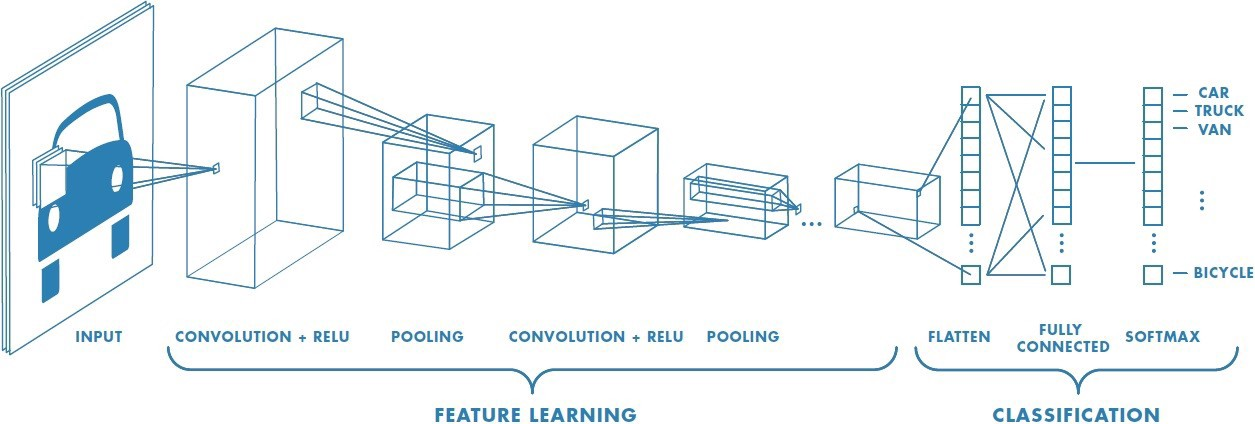


As Redes Neurais Convolucionais demoraram muito para se populaziar porque o poder computacional da época em que foram criadas tornava a técnica inviável. O avanço das tecnologias de GPU para computação de propósito geral, sobretudo com o CUDA, viabilizou a revolução na área de redes neurais conhecida como Deep Learning.

## Treinando com o Redes Convolucionais

Primeiro precisamos ler o dataset de imagens MNIST, que consiste em 70k exemplos de dígitos manuscritos para classificação do dígito correto de 0 a 9. O conjunto é formado por imagens de tamanho 28x28 com pixels de intensidade entre 0 e 255.

In [46]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Escalar imagens para intervalo de 0 a 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Formatar todas as imagens para dimensões (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print( "Dimensões de x_train:", x_train.shape)
print('Tamanho do treino:', x_train.shape[0])
print('Tamanho de teste:',x_test.shape[0])

11501568/11490434 [==============================] - 0s 0us/step
Dimensões de x_train: (60000, 28, 28, 1)
Tamanho do treino: 60000
Tamanho de teste: 10000


Classe:  5


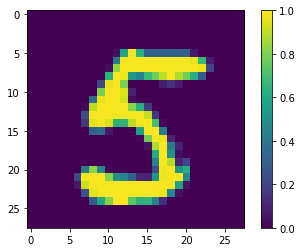

In [55]:
random_instance = np.random.randint(0, y_train.shape[0])
print('Classe: ', y_train[random_instance])

plt.imshow(x_train[random_instance, :, :, 0])
plt.colorbar()

O próximo passo é criar uma coluna para cada uma das classes ao invés de um único dígito inteiro.

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [57]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Agora podemos criar nosso modelo com uma rede convolucional simples. Não entraremos nos detalhes de funcionamento das camadas e recursos utilizados nesta técnica por não serem de rápida compreensão. Ao invés de utilizar `model.add` a cada nova camada também é possível criar diretamente o modelo utilizando uma lista, conforme o exemplo abaixo.

In [58]:
model = keras.Sequential(
    [
        InputLayer(input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

Agora que nossa arquitetura está definida podemos compilar o modelo, definir uma função de custo, um algoritmo de treinamento e as métricas a serem monitoradas.

In [59]:
model.compile(optimizer='adam',
              metrics=['acc'],
              loss='categorical_crossentropy')

Para este treinamento utilizaremos um tamanho de batch de 128 e 5 épocas. Repare que temos uma quantidade grande de parâmetros para treinar, fazendo com que o treinamento seja significativamente mais lento que no exemplo anterior.

In [60]:
model.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 47s 100ms/step - loss: 0.3463 - acc: 0.8934
Epoch 2/5
469/469 [==============================] - 47s 100ms/step - loss: 0.1096 - acc: 0.9669
Epoch 3/5
469/469 [==============================] - 47s 101ms/step - loss: 0.0830 - acc: 0.9750
Epoch 4/5
469/469 [==============================] - 47s 100ms/step - loss: 0.0686 - acc: 0.9790
Epoch 5/5
469/469 [==============================] - 47s 101ms/step - loss: 0.0591 - acc: 0.9820


Por fim avaliamos a performance do modelo, como fizemos anteriormente

In [61]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0345 - acc: 0.9883


[0.034527793526649475, 0.9883000254631042]